<table align="left" width=100%>
    <tr>
        <td width="20%">
            <img src="GL-2.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Capstone Project <br> Notebook_5  </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import functions to perform scaling and normalization
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler

import statsmodels
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler

# import various functions from sklearn 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 

In [2]:
df = pd.read_csv('data1.csv',index_col=0)
df.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,Yes,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,0.700000,0.700000,6.300000,0.000000,0.000000,97.200000,0.000000,0.000000,58.000000,24.000000,1.300000,0.000000,0.300000,61,2,1,2.000000,2.000000,361.000000,62.000000,0.000000,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30.000000,Yes,Highest,Suburban,Professional,No
1,Yes,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.300000,0.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.300000,0.000000,0.000000,58,1,1,2.000000,1.000000,1504.000000,40.000000,42.000000,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30.000000,No,Medium,Suburban,Professional,Yes
2,No,38.000000,8.000000,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.300000,0.000000,1.300000,3.700000,0.000000,0.000000,0.000000,60,1,1,1.000000,1.000000,1812.000000,26.000000,26.000000,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,82.086412,No,Medium,Town,Professional,Yes
3,No,82.280000,1312.000000,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,52.000000,7.700000,76.000000,4.300000,1.300000,200.300000,370.300000,147.000000,555.700000,303.700000,59.700000,0.000000,22.700000,59,2,2,9.000000,4.000000,458.000000,30.000000,0.000000,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10.000000,No,Medium,Other,Other,No
4,Yes,17.140000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53,2,2,4.000000,3.000000,852.000000,46.000000,54.000000,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10.000000,No,Highest,Other,Professional,Yes


In [3]:
df.reset_index(inplace=True, drop=True)

### Split the dependent and independent variables

In [4]:
# store the target variable 'Loan Status' in a dataframe 'df_target'
df_target = df['Churn']

# store all the independent variables in a dataframe 'df_feature' 
# drop the column 'Loan Status' using drop()
# 'axis = 1' drops the specified column
df_features = df.drop('Churn', axis = 1)

In [5]:
df_target.value_counts()

No     36336
Yes    14711
Name: Churn, dtype: int64

In [6]:
for i in range(len(df_target)):
    if df_target[i] == 'Yes':
        df_target[i] = 1
    else:
        df_target[i] = 0 

In [7]:
df_target = df_target.astype(int)

In [8]:
df_target.value_counts()

0    36336
1    14711
Name: Churn, dtype: int64

## Distribution of dependent variable.

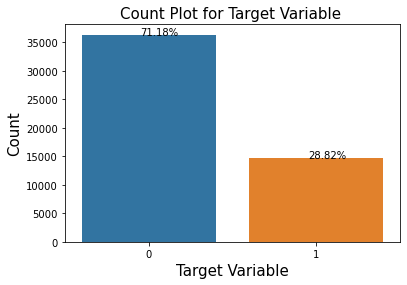

In [9]:
# get counts of 0's and 1's in the 'Loan Status' variable
df_target.value_counts()

# plot the countplot of the variable 'Loan Status'
sns.countplot(x = df_target)

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = -0.05, y = df_target.value_counts()[0] + 1, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.95, y = df_target.value_counts()[1] +1, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Target Variable ', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

## Filter numerical and categorical variables.

In [10]:
# filter the numerical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.number]' will include all the numerical variables
num_f = df_features.select_dtypes(include=[np.number])

# display numerical features
num_f.columns

Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2',
       'RetentionCalls', 'RetentionOffersAccepted',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCreditRating',
       'HandsetPrice'],
      dtype='object')

In [11]:
# filter the categorical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.object]' will include all the categorical variables
cat_f = df_features.select_dtypes(exclude=[np.number])

# display categorical features
cat_f.columns

Index(['ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner',
       'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatus'],
      dtype='object')

## Encoding the Categorical Variables

In [12]:
cat=df_features.select_dtypes(include='object').columns
cat

Index(['ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner',
       'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatus'],
      dtype='object')

In [13]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
cat_f[cat]=enc.fit_transform(cat_f[cat])

In [14]:
cat_f.head()

,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000
1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
2,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,3.000000,1.000000,2.000000
3,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000


In [15]:
cat_f.shape

(51047, 20)

## POWER TRANSFORMATION

As our data has both positive and negative values, we have used `yeo-johnson` power Transformation as it works for both.

In [16]:
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in num_f.columns:
    num_f[i]=PT.fit_transform(num_f[[i]])

In [17]:
num_f.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice
0,-1.082369,-0.421751,-1.115167,-0.046949,-0.997358,-0.624205,-0.568422,-0.452641,-0.884189,-0.301052,-0.562132,-0.823872,-0.603512,0.464930,-1.604073,-1.178797,0.017986,-0.212723,-0.892987,-0.067861,-0.146540,2.469209,1.162529,-0.582570,0.806202,1.119147,0.104248,1.172629,-0.939988,5.315383,-0.132521,-0.221337,-0.004500,-0.193264,-1.451473
1,-1.544529,-1.929925,-1.432596,-0.913645,-0.997358,-0.624205,0.019778,0.088431,-1.195110,-1.212365,-1.006690,-0.823872,-0.603512,-1.595289,-1.604073,-1.178797,-1.309976,-1.529097,-1.422588,-0.067861,-0.894945,2.379749,-0.761324,-0.582570,0.806202,-0.767323,3.032275,0.489795,1.056899,-0.188133,-0.132521,-0.221337,0.292259,-0.193264,-1.451473
2,-0.418867,-1.990079,-0.274582,-0.913645,-0.997358,-0.624205,0.027546,0.088431,-1.510615,-1.212365,-1.752468,-0.823872,-0.603512,-1.489334,-1.459857,-1.178797,-1.656010,-1.147309,-1.667934,-0.067861,-0.894945,2.439936,-0.761324,-0.582570,-0.850981,-0.767323,3.588786,-0.021550,0.853192,-0.188133,-0.132521,-0.221337,0.576107,-0.193264,0.096055
3,0.825055,1.394624,1.183628,1.168135,-0.997358,-0.624205,0.657477,0.284972,2.226035,1.293586,1.350745,1.504542,1.948860,0.943697,2.901567,2.060902,2.500800,1.812611,2.043458,-0.067861,1.849345,2.410123,1.162529,1.345801,1.895777,1.700439,0.461886,0.133216,-0.939988,-0.188133,-0.132521,-0.221337,0.576107,-0.193264,-2.329307
4,-1.533157,-2.456462,-1.432596,-0.913645,-0.997358,-0.624205,0.035335,0.083232,-1.510615,-1.212365,-1.752468,-0.823872,-0.603512,-1.595289,-1.604073,-1.178797,-1.888772,-1.799405,-1.667934,-0.067861,-0.894945,2.218719,1.162529,1.345801,1.593759,1.552447,1.617266,0.687632,1.160401,-0.188133,-0.132521,-0.221337,1.370258,5.174275,-2.329307


In [18]:
num_f.shape

(51047, 35)

#### Concatenate scaled numerical and dummy encoded categorical variables

In [19]:
df_features = pd.concat([cat_f,num_f], axis =1)
df_features.shape

(51047, 55)

In [20]:
df_features.head()

,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice
0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,-1.082369,-0.421751,-1.115167,-0.046949,-0.997358,-0.624205,-0.568422,-0.452641,-0.884189,-0.301052,-0.562132,-0.823872,-0.603512,0.464930,-1.604073,-1.178797,0.017986,-0.212723,-0.892987,-0.067861,-0.146540,2.469209,1.162529,-0.582570,0.806202,1.119147,0.104248,1.172629,-0.939988,5.315383,-0.132521,-0.221337,-0.004500,-0.193264,-1.451473
1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,-1.544529,-1.929925,-1.432596,-0.913645,-0.997358,-0.624205,0.019778,0.088431,-1.195110,-1.212365,-1.006690,-0.823872,-0.603512,-1.595289,-1.604073,-1.178797,-1.309976,-1.529097,-1.422588,-0.067861,-0.894945,2.379749,-0.761324,-0.582570,0.806202,-0.767323,3.032275,0.489795,1.056899,-0.188133,-0.132521,-0.221337,0.292259,-0.193264,-1.451473
2,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,3.000000,1.000000,2.000000,-0.418867,-1.990079,-0.274582,-0.913645,-0.997358,-0.624205,0.027546,0.088431,-1.510615,-1.212365,-1.752468,-0.823872,-0.603512,-1.489334,-1.459857,-1.178797,-1.656010,-1.147309,-1.667934,-0.067861,-0.894945,2.439936,-0.761324,-0.582570,-0.850981,-0.767323,3.588786,-0.021550,0.853192,-0.188133,-0.132521,-0.221337,0.576107,-0.193264,0.096055
3,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.825055,1.394624,1.183628,1.168135,-0.997358,-0.624205,0.657477,0.284972,2.226035,1.293586,1.350745,1.504542,1.948860,0.943697,2.901567,2.060902,2.500800,1.812611,2.043458,-0.067861,1.849345,2.410123,1.162529,1.345801,1.895777,1.700439,0.461886,0.133216,-0.939988,-0.188133,-0.132521,-0.221337,0.576107,-0.193264,-2.329307
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,-1.533157,-2.456462,-1.432596,-0.913645,-0.997358,-0.624205,0.035335,0.083232,-1.510615,-1.212365,-1.752468,-0.823872,-0.603512,-1.595289,-1.604073,-1.178797,-1.888772,-1.799405,-1.667934,-0.067861,-0.894945,2.218719,1.162529,1.345801,1.593759,1.552447,1.617266,0.687632,1.160401,-0.188133,-0.132521,-0.221337,1.370258,5.174275,-2.329307


In [21]:
df_target.nunique()

2

## Train-Test Split

Before applying various classification techniques to predict the Churn, let us split the dataset in train and test set.

In [22]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
x_train, x_test ,y_train ,y_test = train_test_split(df_features,df_target, random_state=10, test_size=0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('x_train: ',x_train.shape)
print('y_train: ',y_train.shape)

# print dimension of test set
print('x_test: ',x_test.shape)
print('y_test: ',y_test.shape)

x_train:  (35732, 55)
y_train:  (35732,)
x_test:  (15315, 55)
y_test:  (15315,)


#### Create a generalized function to calculate the performance metrics for the test set.

In [23]:
# create a generalized function to calculate the performance metrics values for test set
def get_test_report(model, test_data):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(test_data)

    # return the classification report for test data
    return(classification_report(y_test, test_pred))

#### Define a function to plot the confusion matrix.

In [24]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model, test_data):
    
    # predict the target values using X_test
    y_pred = model.predict(test_data)
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_test, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

#### Define a function to plot the ROC curve.

In [25]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model, test_data):
    
    # predict the probability of target variable using X_test
    # consider the probability of positive class by subsetting with '[:,1]'
    y_pred_prob = model.predict_proba(test_data)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve for Cancer Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

<a id="knn"></a>
# 3. K Nearest Neighbors (KNN)

KNN is a classification machine learning algorithm used to identify the class of the observation. This algorithm search for `K` nearest points to determine the class of an observation. To identify the nearest points, it considers the distance metrics like `Euclidean`, `Manhattan`, `Chebyshev`, `Hamming`, and so on.

#### Build a knn model on a training dataset using euclidean distance (Standardized Data)

In [26]:
# instantiate the 'KNeighborsClassifier'
# n_neighnors: number of neighbors to consider
# default metric is minkowski, and with p=2 it is equivalent to the euclidean metric
knn_classification = KNeighborsClassifier(n_neighbors = 3)

# fit the model using fit() on train data
knn_model = knn_classification.fit(x_train, y_train)

#### Build a confusion matrix.

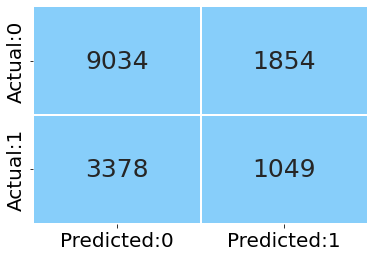

In [27]:
# call the function to plot the confusion matrix
# pass the knn model to the function
plot_confusion_matrix(knn_model, test_data = x_test)

**Calculate performance measures on the test set.**

In [28]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the knn model to the function
test_report = get_test_report(knn_model, test_data =x_test)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.73      0.83      0.78     10888
           1       0.36      0.24      0.29      4427

    accuracy                           0.66     15315
   macro avg       0.54      0.53      0.53     15315
weighted avg       0.62      0.66      0.63     15315



**Interpretation:** The accuracy is 99% for this model.

**Plot the ROC curve.**

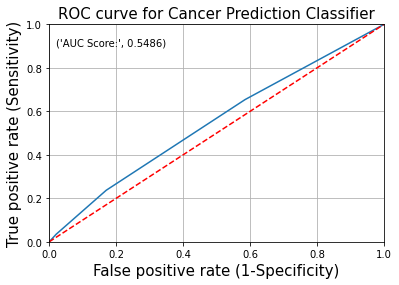

In [29]:
# call the function to plot the ROC curve
# pass the knn model to the function
plot_roc(knn_model, test_data = x_test)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that our classifier (knn_model with n_neighbors = 3) is away from the dotted line; with the AUC score 0.9991.

<a id="hyper"></a>
## 3.1 Optimal Value of K (using GridSearchCV)

In [30]:
import time 

In [ ]:
%%time
# create a dictionary with hyperparameters and its values
# n_neighnors: number of neighbors to consider
# usually, we consider the odd value of 'n_neighnors' to avoid the equal number of nearest points with more than one class
# pass the different distance metrics to the parameter, 'metric'
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
 
# instantiate the 'KNeighborsClassifier' 
knn_classification = KNeighborsClassifier()


knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')

# fit the model on X_train and y_train using fit()
knn_grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

In [32]:
#knn for n_neigbour=7,metric=manhattan

In [39]:
knn_class = KNeighborsClassifier(n_neighbors = 23)
knn_model_1 = knn_class.fit(x_train, y_train)

In [40]:
test_report = get_test_report(knn_model_1, test_data = x_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.72      0.97      0.83     10888
           1       0.45      0.06      0.10      4427

    accuracy                           0.71     15315
   macro avg       0.58      0.51      0.46     15315
weighted avg       0.64      0.71      0.62     15315



In [49]:
knn_model_1.score(x_train,y_train)

0.7214821448561514

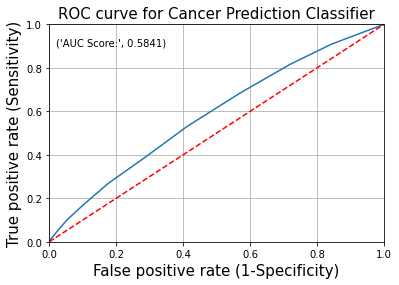

In [41]:
plot_roc(knn_model_1, test_data = x_test)

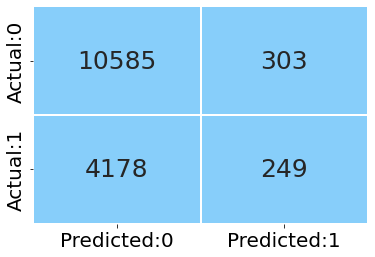

In [42]:
plot_confusion_matrix(knn_model_1, test_data = x_test)

#### Draw a line plot to see the error rate for each value of K using euclidean distance as a metric of KNN model

In [45]:
import time

In [ ]:
%%time
# consider an empty list to store error rate
error_rate = []

# use for loop to build a knn model for each K
for i in np.arange(1,25,2):
    
    # setup a knn classifier with k neighbors
    # use the 'euclidean' metric 
    knn = KNeighborsClassifier(i, metric = 'manhattan')
   
    # fit the model using 'cross_val_score'
    # pass the knn model as 'estimator'
    # use 5-fold cross validation
    score = cross_val_score(knn_grid, x_train, y_train, cv = 5)
    
    # calculate the mean score
    score = score.mean()
    
    # compute error rate 
    error_rate.append(1 - score)

# plot the error_rate for different values of K 
plt.plot(range(1,25,2), error_rate)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Error Rate', fontsize = 15)
plt.xlabel('K', fontsize = 15)
plt.ylabel('Error Rate', fontsize = 15)

# set the x-axis labels
plt.xticks(np.arange(1, 25, step = 2))

# plot a vertical line across the minimum error rate
plt.axvline(x = 7, color = 'red')

# display the plot
plt.show()

**Interpretation:** We can see that the optimal value of K (= 7) obtained from the GridSearchCV() results in a lowest error rate. 

**Calculate performance measures on the test set.**

In [ ]:
# print the performance measures for test set for the model with best parameters
# call the function 'get_test_report'
# pass the knn model using GridSearch to the function
print('Classification Report for test set: \n', get_test_report(knn_grid, test_data=x_test))

**Plot the ROC curve.**

In [ ]:
# call the function to plot the ROC curve
# pass the knn model to the function
plot_roc(knn_grid, test_data=x_test)

**Interpretation:** From the above plot, we can see that our classifier (knn_model with n_neighbors = 7) is away from the red dotted line (i.e on the axes); with the AUC score 1.0.

<a id="NB"></a>
# 4. Naive Bayes Algorithm

It uses a `Bayes' Theorem` with the assumption of independence of predictor variables. The sklearn library provides different naive bayes classifiers, as `GaussianNB`, `MultinomialNB` and so on. 

#### Build a naive bayes model on a training dataset.

In [50]:
# instantiate the 'GaussianNB'
gnb = GaussianNB()

# fit the model using fit() on train data
gnb_model = gnb.fit(x_train, y_train)

#### Build a confusion matrix.

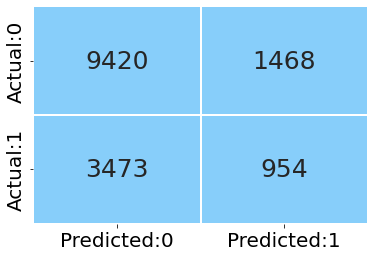

In [51]:
# call the function to plot the confusion matrix
# pass the gaussian naive bayes model to the function
plot_confusion_matrix(gnb_model, test_data=x_test)

**Calculate performance measures on the test set.**

In [52]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the gaussian naive bayes model to the function
test_report = get_test_report(gnb_model, test_data=x_test)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.73      0.87      0.79     10888
           1       0.39      0.22      0.28      4427

    accuracy                           0.68     15315
   macro avg       0.56      0.54      0.54     15315
weighted avg       0.63      0.68      0.64     15315



In [55]:
gnb_model.score(x_train,y_train)

0.6803705362140379

**Plot the ROC curve.**

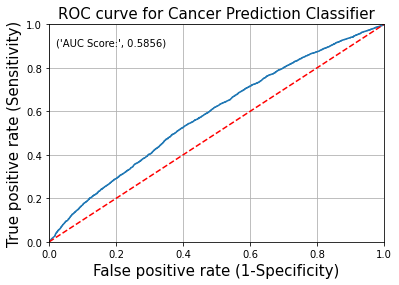

In [53]:
# call the function to plot the ROC curve
# pass the gaussian naive bayes model to the function
plot_roc(gnb_model, test_data=x_test)

**Interpretation:** From the above plot, we can see that our classifier (gnb_model) is away from the red dotted line; with the AUC score 0.9781.

**Note:** Algorithms like Naive Bayes and tree based algorithms do not need feature scaling or normalization. Performing a features scaling in these algorithms may not have much effect.

<a id="tune"></a>
### 3.3.1 Tune the Hyperparameters (GridSearchCV)

In [56]:
import time

In [ ]:
%%time
# create a dictionary with hyperparameters and its values
# learning_rate: pass the list of boosting learning rates
# max_depth: pass the range of values as the maximum tree depth for base learners
# gamma: pass the list of minimum loss reduction values required to make a further partition on a leaf node of the tree
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3],
                     'max_depth': range(3,10),
                     'min_child_weight':range(1,5),
                     'gamma': [ 1, 2, 3],
                     'subsample':[0.25,0.5,1],
                    }


# instantiate the 'XGBClassifier' 
gnb_model = GaussianNB()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the XGBoost classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
# scoring: pass a measure to evaluate the model on test set
gnb_grid = GridSearchCV(estimator = gnb_model, param_grid = tuning_parameters, cv = 5, scoring = 'recall')

# fit the model on X_train and y_train using fit()
gnb_grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters for gnb: ', gnb_grid.best_params_, '\n')

#### Build the model using the tuned hyperparameters.

In [49]:
#learning_rate = xgb_grid.best_params_.get('learning_rate'),
                              # max_depth = xgb_grid.best_params_.get('max_depth'),
                              #gamma = xgb_grid.best_params_.get('gamma'),
                              #tree_method=xgb_grid.best_params_.get('tree_method'),
                              #subsample=xgb_grid.best_params_.get('subsample'),
                              #colsample_bytree=xgb_grid.best_params_.get('colsample_bytree')

# instantiate the 'XGBClassifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
gnb_model1 = GaussianNB( )



# use fit() to fit the model on the train set
gnb_model = gnb_model1.fit(x_train, y_train)

# print the performance measures for test set for the model with best parameters
print('Classification Report for test set:\n', get_test_report(gnb_model))

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.73      0.96      0.83     10888
           1       0.58      0.14      0.23      4427

    accuracy                           0.72     15315
   macro avg       0.66      0.55      0.53     15315
weighted avg       0.69      0.72      0.66     15315



In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
scores=cross_val_score(gnb_model,x_train,y_train,scoring='recall')
np.mean(scores)

0.13934169931277654

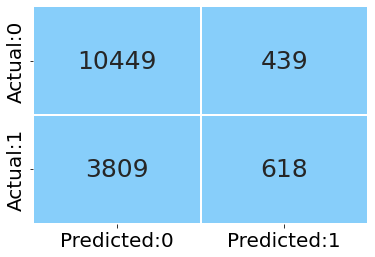

In [51]:
y_pred=xgb_model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [52]:
gnb_model.score(x_train,y_train)

0.7478730549647374

In [53]:
gnb_model.score(x_test,y_test)

0.7226248775710088

<a id="compare"></a>
# 5. Comparison between KNN Model and Naive Bayes Model

In [ ]:
# y_pred and y_pred_prob is differ

In [ ]:
# K Nearest Neighbors
y_pred_prob_knn = knn_grid.predict_proba(x_test)[:,1]
    
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_knn)

# add the AUC score to the plot
auc_score_knn = roc_auc_score(y_test, y_pred_prob_knn)

# plot the ROC curve
plt.plot(fpr, tpr, label='KNN Model (AUC Score = %0.4f)' % auc_score_knn)

# Gaussian Naive Bayes
y_pred_prob_gnb = gnb_model.predict_proba(x_test)[:,1]
    
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_gnb)

# add the AUC score to the plot
auc_score_gnb = roc_auc_score(y_test, y_pred_prob_gnb)

# plot the ROC curve
plt.plot(fpr, tpr, label='GNB Model (AUC Score = %0.4f)' % auc_score_gnb)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('GNB Model Vs. KNN Model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# set the position of legend
plt.legend(loc = 'lower right')

# plot the grid
plt.grid(True)

**Interpretation:** The Auc Score of KNN Model is slightly higher than that of Gaussian Naive Bayes model. Also KNN model is more stable than Gaussian Naive Bayes model.